# ロジスティクス回帰

分類学習アルゴリズム

シグモイド関数を使って尤もらしく分類する

つまり、$N$個のデータの確率対数のlogの和を最大化する (2値分類)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## シグモイド関数

sig(x) $\to$[0, 1]であり、確率を出力できる関数と用いることができる

正のラベル(y=1)であれば、$wx + b$の値が大きいほど正のラベルであるという分類確率が高い。
逆も同様。

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

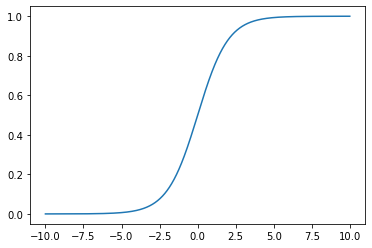

In [3]:
sig_x = np.arange(-10, 10, 0.01)
sig_y = sigmoid(sig_x)
plt.plot(sig_x, sig_y)

In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [5]:
iris = load_iris()
print(iris.data[0:10], iris.data[0][:])
print("shape: ", iris.data.shape)
print("target_names 花の名前: ", iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [5.1 3.5 1.4 0.2]
shape:  (150, 4)
target_names 花の名前:  ['setosa' 'versicolor' 'virginica']


In [107]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 0:setosa  1:versicolor
df['target'] = iris.target
df[0:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [108]:
# クラスを2値に絞る
df = df[df['target'] < 2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [109]:
X = df.drop('target', axis=1)
y = df['target']

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# テスト用に分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=334)

In [110]:
# ロジスティクス学習
model = LogisticRegression().fit(X_train, y_train)

In [111]:
# 予測
print(model.predict(X_test))

[1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0]


In [112]:
# スコア（精度） そんなに出ますか？　おかしい気がしますね　しますよします
model.score(X_test, y_test)

1.0